In [21]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd

train_file_path = '/content/drive/My Drive/stock/Google_Stock_Price_Train.csv'
test_file_path = '/content/drive/My Drive/stock/Google_Stock_Price_Test.csv'

df_train = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [24]:
df = pd.concat([df_train, df_test])
df_open = df.loc[:, ["Open"]].values

train_data = df_open[:len(df_open)-50]
test_data = df_open[len(train_data):]

In [25]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)

X_train, y_train = [], []
time_steps = 50

for i in range(time_steps, len(train_scaled)):
    X_train.append(train_scaled[i-time_steps:i, 0])
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [26]:
inputs = df_open[len(df_open) - len(test_data) - time_steps:]
inputs = scaler.transform(inputs)

X_test = []
for i in range(time_steps, len(inputs)):
    X_test.append(inputs[i-time_steps:i, 0])

X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [27]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dropout(0.2))
rnn_model.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
rnn_model.add(Dropout(0.2))
rnn_model.add(SimpleRNN(units=50, activation='tanh'))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(units=1))

rnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])
history_rnn = rnn_model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1, validation_split=0.2)

predicted_rnn = rnn_model.predict(X_test)
predicted_rnn = scaler.inverse_transform(predicted_rnn)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.4851 - mean_absolute_error: 0.5498 - mean_squared_error: 0.4851 - val_loss: 0.0048 - val_mean_absolute_error: 0.0613 - val_mean_squared_error: 0.0048
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.1816 - mean_absolute_error: 0.3355 - mean_squared_error: 0.1816 - val_loss: 0.0025 - val_mean_absolute_error: 0.0382 - val_mean_squared_error: 0.0025
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1068 - mean_absolute_error: 0.2646 - mean_squared_error: 0.1068 - val_loss: 0.0099 - val_mean_absolute_error: 0.0938 - val_mean_squared_error: 0.0099
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0795 - mean_absolute_error: 0.2216 - mean_squared_error: 0.0795 - val_loss: 0.0012 - val_mean_absolute_error: 0.0272 - val_mean_squared_error: 0.0012
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0614 - mean_absolute_error: 0.1923 - mean_squared_error: 0.0614 - val_loss: 0.0015 - val_mean_absolute_err

In [28]:
modified_rnn_model = Sequential()
modified_rnn_model.add(SimpleRNN(units=64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
modified_rnn_model.add(Dropout(0.3))
modified_rnn_model.add(SimpleRNN(units=32, activation='tanh'))
modified_rnn_model.add(Dense(units=1))

modified_rnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])
history_modified_rnn = modified_rnn_model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1, validation_split=0.2)

predicted_modified_rnn = modified_rnn_model.predict(X_test)
predicted_modified_rnn = scaler.inverse_transform(predicted_modified_rnn)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0914 - mean_absolute_error: 0.2234 - mean_squared_error: 0.0914 - val_loss: 0.0017 - val_mean_absolute_error: 0.0351 - val_mean_squared_error: 0.0017
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0137 - mean_absolute_error: 0.0878 - mean_squared_error: 0.0137 - val_loss: 0.0019 - val_mean_absolute_error: 0.0381 - val_mean_squared_error: 0.0019
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0061 - mean_absolute_error: 0.0587 - mean_squared_error: 0.0061 - val_loss: 8.3585e-04 - val_mean_absolute_error: 0.0237 - val_mean_squared_error: 8.3585e-04
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0041 - mean_absolute_error: 0.0485 - mean_squared_error: 0.0041 - val_loss: 7.2458e-04 - val_mean_absolute_error: 0.0219 - val_mean_squared_error: 7.2458e-04
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0036 - mean_absolute_error: 0.0455 - mean_squared_error: 0.0036 - val_loss: 0.0010 - val_m

In [29]:
new_rnn_model = Sequential()
new_rnn_model.add(SimpleRNN(units=64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
new_rnn_model.add(Dropout(0.3))
new_rnn_model.add(SimpleRNN(units=32, activation='tanh'))
new_rnn_model.add(Dense(units=1))

new_rnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

history_new_rnn = new_rnn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

predicted_new_rnn = new_rnn_model.predict(X_test)
predicted_new_rnn = scaler.inverse_transform(predicted_new_rnn)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0929 - mean_absolute_error: 0.2316 - mean_squared_error: 0.0929 - val_loss: 0.0035 - val_mean_absolute_error: 0.0510 - val_mean_squared_error: 0.0035
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0850 - mean_squared_error: 0.0126 - val_loss: 0.0062 - val_mean_absolute_error: 0.0731 - val_mean_squared_error: 0.0062
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0062 - mean_absolute_error: 0.0586 - mean_squared_error: 0.0062 - val_loss: 0.0013 - val_mean_absolute_error: 0.0286 - val_mean_squared_error: 0.0013
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0041 - mean_absolute_error: 0.0468 - mean_squared_error: 0.0041 - val_loss: 0.0015 - val_mean_absolute_error: 0.0321 - val_mean_squared_error: 0.0015
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0031 - mean_absolute_error: 0.0432 - mean_squared_error: 0.0031 - val_loss: 0.0015 - val_mean_absolute

In [30]:
gru_model = Sequential()
gru_model.add(GRU(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(units=50, activation='tanh', return_sequences=True))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(units=50, activation='tanh'))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(units=1))

gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])
history_gru = gru_model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1, validation_split=0.2)

predicted_gru = gru_model.predict(X_test)
predicted_gru = scaler.inverse_transform(predicted_gru)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - loss: 0.0599 - mean_absolute_error: 0.1878 - mean_squared_error: 0.0599 - val_loss: 0.0016 - val_mean_absolute_error: 0.0291 - val_mean_squared_error: 0.0016
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0050 - mean_absolute_error: 0.0551 - mean_squared_error: 0.0050 - val_loss: 0.0016 - val_mean_absolute_error: 0.0339 - val_mean_squared_error: 0.0016
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0027 - mean_absolute_error: 0.0387 - mean_squared_error: 0.0027 - val_loss: 0.0010 - val_mean_absolute_error: 0.0239 - val_mean_squared_error: 0.0010
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - loss: 0.0028 - mean_absolute_error: 0.0376 - mean_squared_error: 0.0028 - val_loss: 0.0011 - val_mean_absolute_error: 0.0245 - val_mean_squared_error: 0.0011
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 0.0024 - mean_absolute_error: 0.0344 - mean_squared_error: 0.0024 - val_loss: 0.0011 - val_mean_absolute_

In [31]:
modified_gru_model = Sequential()
modified_gru_model.add(GRU(units=64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
modified_gru_model.add(Dropout(0.3))  # Increased dropout
modified_gru_model.add(GRU(units=32, activation='tanh'))
modified_gru_model.add(Dense(units=1))

modified_gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])
history_modified_gru = modified_gru_model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1, validation_split=0.2)

predicted_modified_gru = modified_gru_model.predict(X_test)
predicted_modified_gru = scaler.inverse_transform(predicted_modified_gru)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0732 - mean_absolute_error: 0.2018 - mean_squared_error: 0.0732 - val_loss: 0.0280 - val_mean_absolute_error: 0.1642 - val_mean_squared_error: 0.0280
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0034 - mean_absolute_error: 0.0459 - mean_squared_error: 0.0034 - val_loss: 9.3687e-04 - val_mean_absolute_error: 0.0222 - val_mean_squared_error: 9.3687e-04
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0012 - mean_absolute_error: 0.0264 - mean_squared_error: 0.0012 - val_loss: 9.0784e-04 - val_mean_absolute_error: 0.0233 - val_mean_squared_error: 9.0784e-04
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0013 - mean_absolute_error: 0.0258 - mean_squared_error: 0.0013 - val_loss: 8.6890e-04 - val_mean_absolute_error: 0.0224 - val_mean_squared_error: 8.6890e-04
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0012 - mean_absolute_error: 0.0257 - mean_squared_error: 0.0012 - val_loss: 8.4281

In [32]:
new_gru_model = Sequential()
new_gru_model.add(GRU(units=64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
new_gru_model.add(Dropout(0.3))
new_gru_model.add(GRU(units=32, activation='tanh'))
new_gru_model.add(Dense(units=1))

new_gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

history_new_gru = new_gru_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

predicted_new_gru = new_gru_model.predict(X_test)
predicted_new_gru = scaler.inverse_transform(predicted_new_gru)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.0479 - mean_absolute_error: 0.1627 - mean_squared_error: 0.0479 - val_loss: 0.0099 - val_mean_absolute_error: 0.0953 - val_mean_squared_error: 0.0099
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0026 - mean_absolute_error: 0.0401 - mean_squared_error: 0.0026 - val_loss: 0.0013 - val_mean_absolute_error: 0.0268 - val_mean_squared_error: 0.0013
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0017 - mean_absolute_error: 0.0287 - mean_squared_error: 0.0017 - val_loss: 7.8945e-04 - val_mean_absolute_error: 0.0207 - val_mean_squared_error: 7.8945e-04
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0012 - mean_absolute_error: 0.0243 - mean_squared_error: 0.0012 - val_loss: 7.8587e-04 - val_mean_absolute_error: 0.0207 - val_mean_squared_error: 7.8587e-04
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0012 - mean_absolute_error: 0.0255 - mean_squared_error: 0.0012 - val_loss: 7.9106e-04

In [33]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, activation='tanh', return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, activation='tanh'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])
history_lstm = lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1, validation_split=0.2)

predicted_lstm = lstm_model.predict(X_test)
predicted_lstm = scaler.inverse_transform(predicted_lstm)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 0.0746 - mean_absolute_error: 0.1933 - mean_squared_error: 0.0746 - val_loss: 0.0101 - val_mean_absolute_error: 0.0912 - val_mean_squared_error: 0.0101
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 0.0043 - mean_absolute_error: 0.0474 - mean_squared_error: 0.0043 - val_loss: 0.0019 - val_mean_absolute_error: 0.0354 - val_mean_squared_error: 0.0019
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0034 - mean_absolute_error: 0.0441 - mean_squared_error: 0.0034 - val_loss: 0.0020 - val_mean_absolute_error: 0.0356 - val_mean_squared_error: 0.0020
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 0.0036 - mean_absolute_error: 0.0448 - mean_squared_error: 0.0036 - val_loss: 0.0020 - val_mean_absolute_error: 0.0348 - val_mean_squared_error: 0.0020
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.0034 - mean_absolute_error: 0.0430 - mean_squared_error: 0.0034 - val_loss: 0.0018 - val_mean_absolute_e

In [34]:
modified_lstm_model = Sequential()
modified_lstm_model.add(LSTM(units=128, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
modified_lstm_model.add(Dropout(0.3))
modified_lstm_model.add(LSTM(units=64, activation='tanh', return_sequences=True))
modified_lstm_model.add(Dropout(0.3))
modified_lstm_model.add(LSTM(units=32, activation='tanh'))
modified_lstm_model.add(Dense(units=1))

modified_lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])
history_modified_lstm = modified_lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1, validation_split=0.2)

predicted_modified_lstm = modified_lstm_model.predict(X_test)
predicted_modified_lstm = scaler.inverse_transform(predicted_modified_lstm)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - loss: 0.0467 - mean_absolute_error: 0.1529 - mean_squared_error: 0.0467 - val_loss: 0.0178 - val_mean_absolute_error: 0.1260 - val_mean_squared_error: 0.0178
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - loss: 0.0026 - mean_absolute_error: 0.0376 - mean_squared_error: 0.0026 - val_loss: 0.0018 - val_mean_absolute_error: 0.0344 - val_mean_squared_error: 0.0018
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - loss: 0.0022 - mean_absolute_error: 0.0338 - mean_squared_error: 0.0022 - val_loss: 0.0017 - val_mean_absolute_error: 0.0327 - val_mean_squared_error: 0.0017
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - loss: 0.0022 - mean_absolute_error: 0.0343 - mean_squared_error: 0.0022 - val_loss: 0.0018 - val_mean_absolute_error: 0.0350 - val_mean_squared_error: 0.0018
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - loss: 0.0016 - mean_absolute_error: 0.0300 - mean_squared_error: 0.0016 - val_loss: 0.0018 - val_mean_absolut

In [16]:
new_lstm_model = Sequential()
new_lstm_model.add(LSTM(units=128, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
new_lstm_model.add(Dropout(0.3))  # Increased dropout
new_lstm_model.add(LSTM(units=64, activation='tanh', return_sequences=True))
new_lstm_model.add(Dropout(0.3))
new_lstm_model.add(LSTM(units=32, activation='tanh'))
new_lstm_model.add(Dense(units=1))

new_lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

history_new_lstm = new_lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

predicted_new_lstm = new_lstm_model.predict(X_test)
predicted_new_lstm = scaler.inverse_transform(predicted_new_lstm)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - loss: 0.0541 - mean_absolute_error: 0.1695 - mean_squared_error: 0.0541 - val_loss: 0.0236 - val_mean_absolute_error: 0.1473 - val_mean_squared_error: 0.0236
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - loss: 0.0028 - mean_absolute_error: 0.0392 - mean_squared_error: 0.0028 - val_loss: 0.0025 - val_mean_absolute_error: 0.0425 - val_mean_squared_error: 0.0025
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0020 - mean_absolute_error: 0.0321 - mean_squared_error: 0.0020 - val_loss: 0.0017 - val_mean_absolute_error: 0.0326 - val_mean_squared_error: 0.0017
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - loss: 0.0016 - mean_absolute_error: 0.0289 - mean_squared_error: 0.0016 - val_loss: 0.0023 - val_mean_absolute_error: 0.0366 - val_mean_squared_error: 0.0023
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - loss: 0.0016 - mean_absolute_error: 0.0292 - mean_squared_error: 0.0016 - val_loss: 0.0036 - val_mean_abs

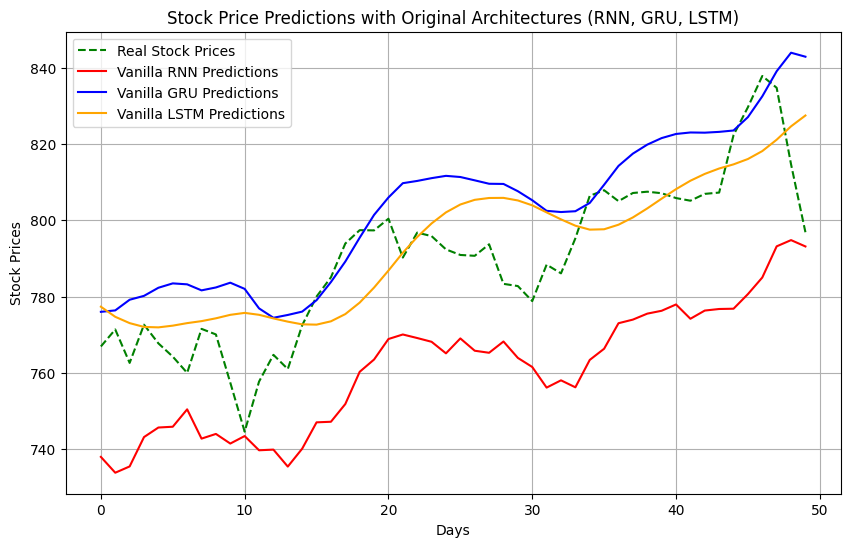

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(test_data, color='green', linestyle='dashed', label="Real Stock Prices")
plt.plot(predicted_rnn, color='red', label="Vanilla RNN Predictions")
plt.plot(predicted_gru, color='blue', label="Vanilla GRU Predictions")
plt.plot(predicted_lstm, color='orange', label="Vanilla LSTM Predictions")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Stock Prices")
plt.title("Stock Price Predictions with Original Architectures (RNN, GRU, LSTM)")
plt.grid(True)
plt.show()


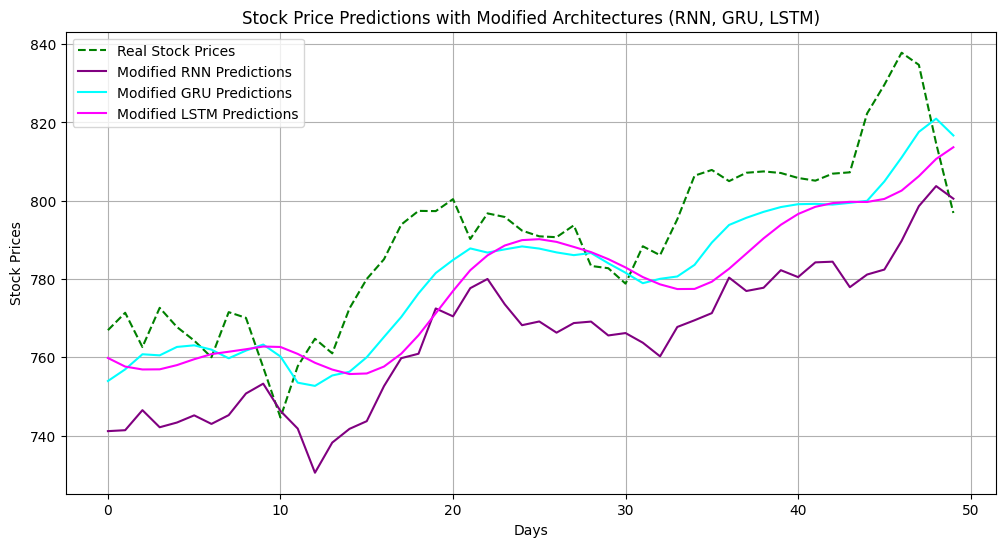

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(test_data, color='green', linestyle='dashed', label="Real Stock Prices")
plt.plot(predicted_modified_rnn, color='purple', label="Modified RNN Predictions")
plt.plot(predicted_modified_gru, color='cyan', label="Modified GRU Predictions")
plt.plot(predicted_modified_lstm, color='magenta', label="Modified LSTM Predictions")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Stock Prices")
plt.title("Stock Price Predictions with Modified Architectures (RNN, GRU, LSTM)")
plt.grid(True)
plt.show()

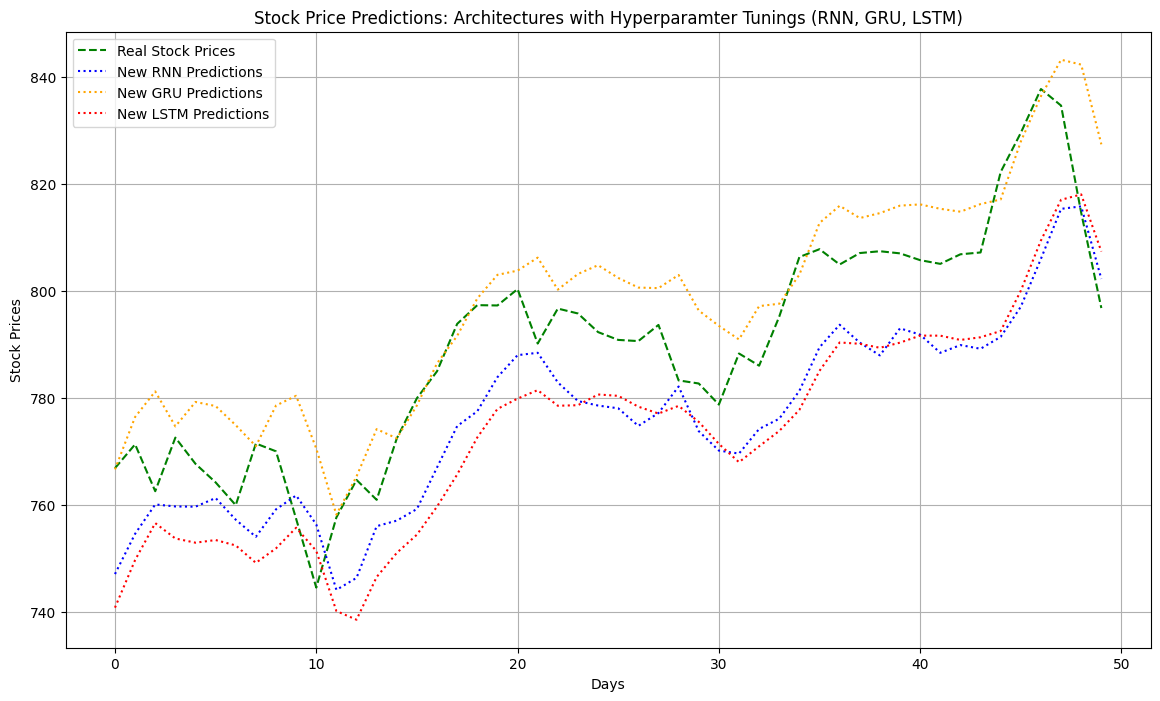

In [19]:
plt.figure(figsize=(14, 8))

plt.plot(test_data, color='green', linestyle='dashed', label="Real Stock Prices")

plt.plot(predicted_new_rnn, color='blue', linestyle='dotted', label="New RNN Predictions")
plt.plot(predicted_new_gru, color='orange', linestyle='dotted', label="New GRU Predictions")
plt.plot(predicted_new_lstm, color='red', linestyle='dotted', label="New LSTM Predictions")

plt.legend()
plt.xlabel("Days")
plt.ylabel("Stock Prices")
plt.title("Stock Price Predictions: Architectures with Hyperparamter Tunings (RNN, GRU, LSTM)")
plt.grid(True)
plt.show()


In [20]:
def calculate_metrics(actual, predicted):
    rmse = math.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    return rmse, mae

rnn_rmse, rnn_mae = calculate_metrics(test_data, predicted_rnn)
gru_rmse, gru_mae = calculate_metrics(test_data, predicted_gru)
lstm_rmse, lstm_mae = calculate_metrics(test_data, predicted_lstm)

modified_rnn_rmse, modified_rnn_mae = calculate_metrics(test_data, predicted_modified_rnn)
modified_gru_rmse, modified_gru_mae = calculate_metrics(test_data, predicted_modified_gru)
modified_lstm_rmse, modified_lstm_mae = calculate_metrics(test_data, predicted_modified_lstm)

new_rnn_rmse, new_rnn_mae = calculate_metrics(test_data, predicted_new_rnn)
new_gru_rmse, new_gru_mae = calculate_metrics(test_data, predicted_new_gru)
new_lstm_rmse, new_lstm_mae = calculate_metrics(test_data, predicted_new_lstm)

print(f"Original RNN - RMSE: {rnn_rmse}, MAE: {rnn_mae}")
print(f"Original GRU - RMSE: {gru_rmse}, MAE: {gru_mae}")
print(f"Original LSTM - RMSE: {lstm_rmse}, MAE: {lstm_mae}")

print(f"Modified RNN - RMSE: {modified_rnn_rmse}, MAE: {modified_rnn_mae}")
print(f"Modified GRU - RMSE: {modified_gru_rmse}, MAE: {modified_gru_mae}")
print(f"Modified LSTM - RMSE: {modified_lstm_rmse}, MAE: {modified_lstm_mae}")

print(f"New RNN - RMSE: {new_rnn_rmse}, MAE: {new_rnn_mae}")
print(f"New GRU - RMSE: {new_gru_rmse}, MAE: {new_gru_mae}")
print(f"New LSTM - RMSE: {new_lstm_rmse}, MAE: {new_lstm_mae}")


Original RNN - RMSE: 30.48043131878782, MAE: 28.6870369140625
Original GRU - RMSE: 16.782390103045994, MAE: 13.793557031249993
Original LSTM - RMSE: 13.083218267500374, MAE: 10.765058007812495
Modified RNN - RMSE: 26.87316424385287, MAE: 24.989783984375
Modified GRU - RMSE: 13.023558282192269, MAE: 11.009869042968749
Modified LSTM - RMSE: 16.68036757303399, MAE: 13.445555810546871
New RNN - RMSE: 16.075422413341396, MAE: 14.321083056640623
New GRU - RMSE: 11.523399487691293, MAE: 8.831802978515617
New LSTM - RMSE: 18.365703310032195, MAE: 16.896446728515624
